Producing graphs with graphviz.

For examples see [here](http://matthiaseisen.com/articles/graphviz/)

In [13]:
from simpleRM.core import DataProvider
from pprint import pprint

ROOT = '../requirements/simpleSE.yml'
dp = DataProvider(ROOT)


pprint(dp.requirements)

OrderedDict([('A01', A01 parent:ROOT children:None,level:0),
             ('A02', A02 parent:ROOT children:['R006'],level:0),
             ('R006', R006 parent:A02 children:None,level:1),
             ('A03',
              A03 parent:ROOT children:['R009c', 'R008', 'R009'],level:0),
             ('R008',
              R008 parent:A03 children:['R008c', 'R008a', 'R008b', 'R008d'],level:1),
             ('R008a', R008a parent:R008 children:None,level:2),
             ('R008b', R008b parent:R008 children:None,level:2),
             ('R008c', R008c parent:R008 children:None,level:2),
             ('R008d', R008d parent:R008 children:None,level:2),
             ('R009', R009 parent:A03 children:['R009a', 'R009b'],level:1),
             ('R009a', R009a parent:R009 children:None,level:2),
             ('R009b', R009b parent:R009 children:None,level:2),
             ('R009c', R009c parent:A03 children:None,level:1),
             ('A04', A04 parent:ROOT children:None,level:0),
             ('A0

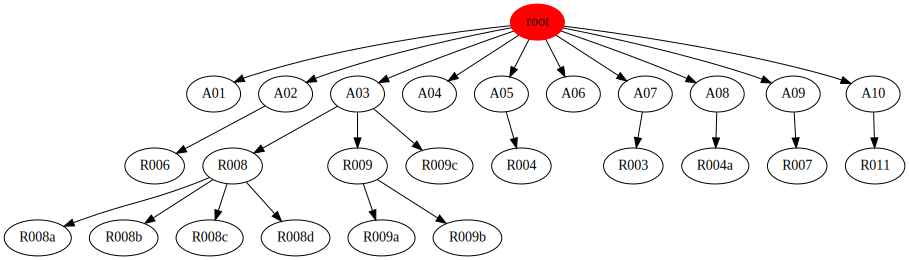

In [24]:
from graphviz import Digraph

dot = Digraph(comment='dependencies', format='svg')

dot.node('ROOT','root',color='red',style='filled')

# requirements
for req in dp.requirements.values():
    dot.node(req.tag,req.tag,URL='foo')
    if req.parent =='ROOT':
        dot.edge('ROOT',req.tag)
    
# dependencies
for req in dp.requirements.values():
    if req.children is not None:
        for child in req.children:
            dot.edge(req.tag, child)
    
dot.render('test')
#print(dot.source)
dot